In [19]:
import numpy as np

X = 2*np.random.rand(100, 1)

y  = 4 + 3*X + np.random.randn(100, 1)

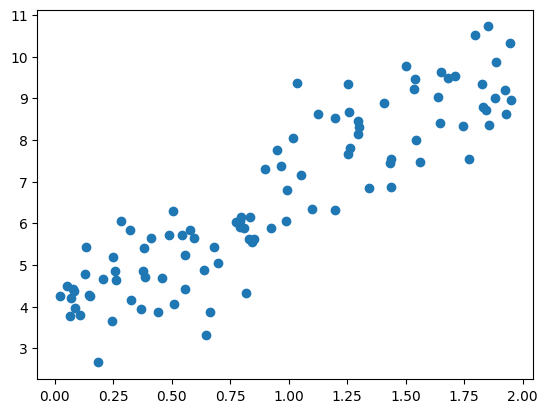

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [21]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.74138806],
       [3.04959892]])

# What does np.c_ do?

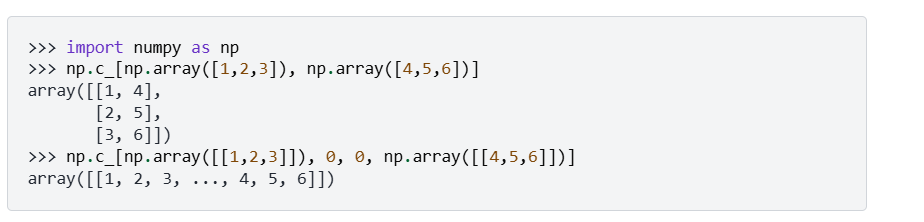

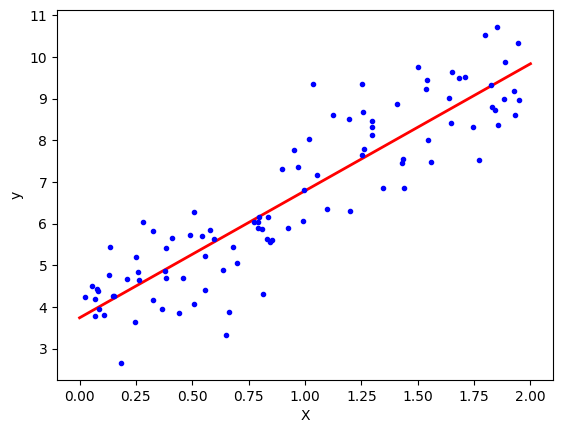

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.74138806]), array([[3.04959892]]))

In [24]:
lin_reg.predict(X_new)

array([[3.74138806],
       [9.84058591]])

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=None)
theta_best_svd

array([[3.74138806],
       [3.04959892]])

# Gradient Descent

In [26]:
eta = 0.1
n_iterations = 1000

m = 100

theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.74138806],
       [3.04959892]])

In [27]:
n_epoch = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [28]:
m = 100

X = 6*np.random.rand(m, 1) - 3
y = 0.5 + 2 * X + 0.5 * X**2 + np.random.randn(m, 1)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-2.28940026]
[-2.28940026  5.24135353]


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)



LinearRegression()

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([0.42548173]), array([[2.03990746, 0.51627119]]))

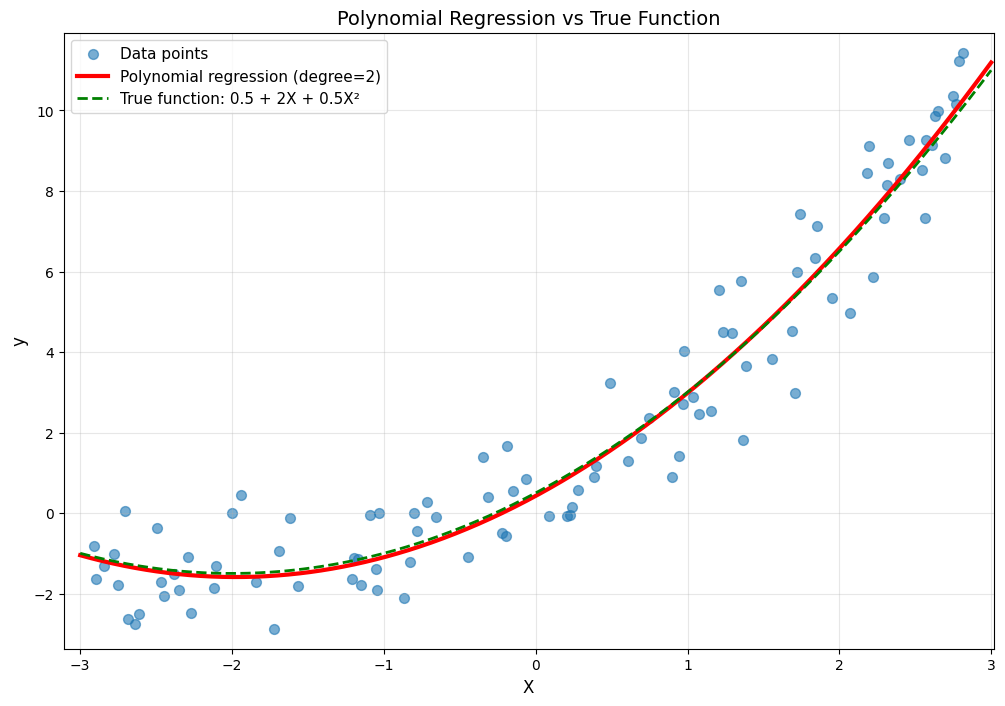

In [32]:
# Create a range of X values for smooth curve plotting with closer spacing
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)  # More points for smoother curve
X_plot_poly = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)

# Also plot the true function for comparison
y_true = 0.5 + 2 * X_plot + 0.5 * X_plot**2

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(X, y, alpha=0.6, label='Data points', s=50)
plt.plot(X_plot, y_plot, 'r-', linewidth=3, label='Polynomial regression (degree=2)')
plt.plot(X_plot, y_true, 'g--', linewidth=2, label='True function: 0.5 + 2X + 0.5X²')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Polynomial Regression vs True Function', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Set limits to match the actual data range
plt.xlim(X.min() - 0.2, X.max() + 0.2)
plt.ylim(y.min() - 0.5, y.max() + 0.5)

plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    m = len(X_train)
    
    for i in range(m):
        model.fit(X_train[:i+1], y_train[:i+1])
        y_pred_test = model.predict(X_train[:i+1])
        y_pred_val = model.predict(X_val[:i+1])
        
        train_errors.append( mean_squared_error(y_pred_test, y_train[:i+1]) )
        val_errors.append( mean_squared_error(y_pred_val,y_val[:i+1]) )
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

        

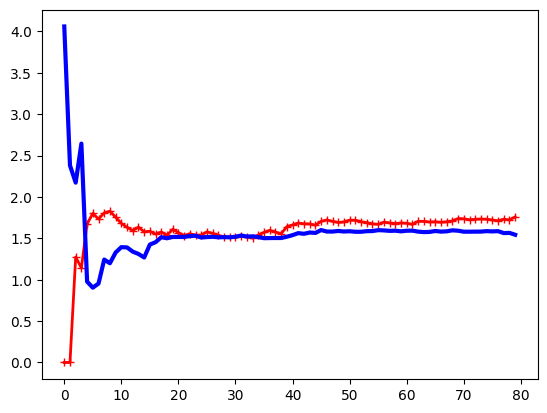

In [43]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
